## Customer Churn Prediction
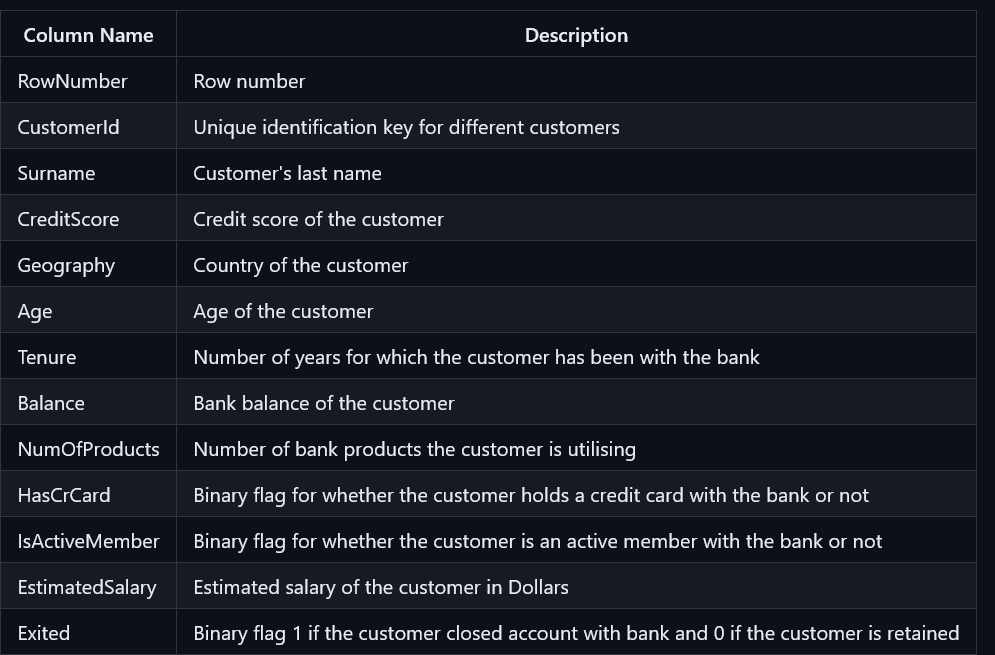

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r'F:\important\Data analyst\Projects\customer churn prediction\Dataset\churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df = df.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [6]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
df.duplicated().sum()

0

In [8]:
df.rename(columns={'Exited':'Churn'}, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0



Descriptive Statistics


In [9]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000



Explorative Data Analysis


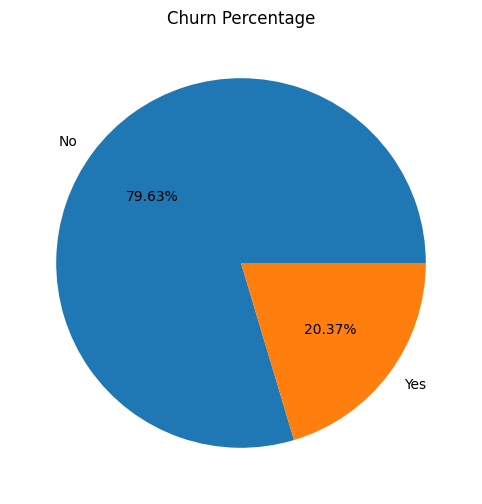

In [10]:
plt.figure(figsize=(10,6))
plt.pie(df['Churn'].value_counts(),labels=['No','Yes'],autopct='%1.2f%%')
plt.title('Churn Percentage')
plt.show()

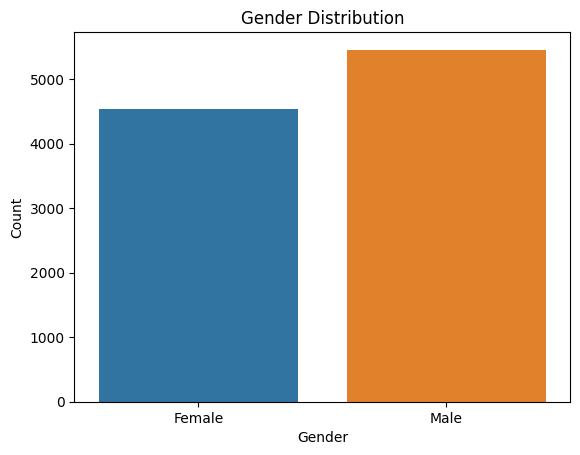

In [11]:
sns.countplot(x = 'Gender', data = df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

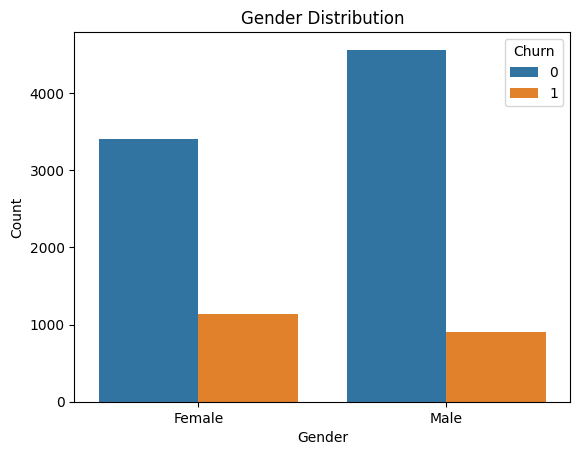

In [12]:
sns.countplot(x = 'Gender', data = df,hue='Churn')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

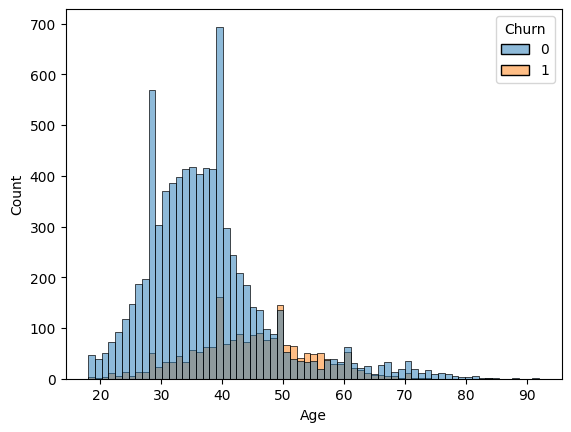

In [13]:
sns.histplot(data=df, x="Age",hue='Churn')

<Axes: xlabel='Churn', ylabel='CreditScore'>

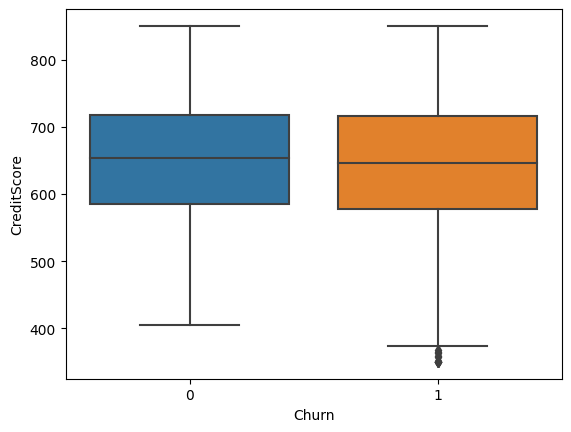

In [14]:
sns.boxplot(x="Churn", y="CreditScore", data=df)


<Axes: xlabel='Churn', ylabel='CreditScore'>

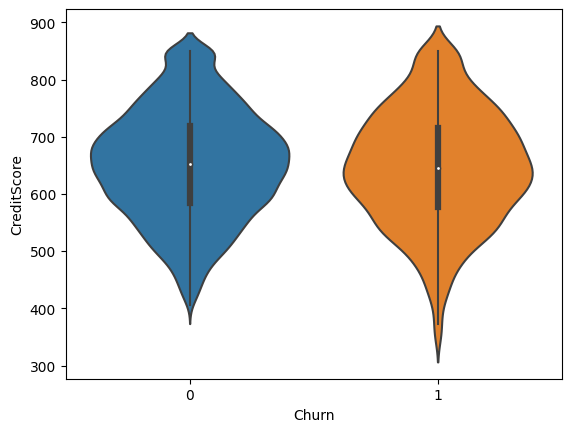

In [15]:
sns.violinplot(x="Churn", y="CreditScore", data=df)

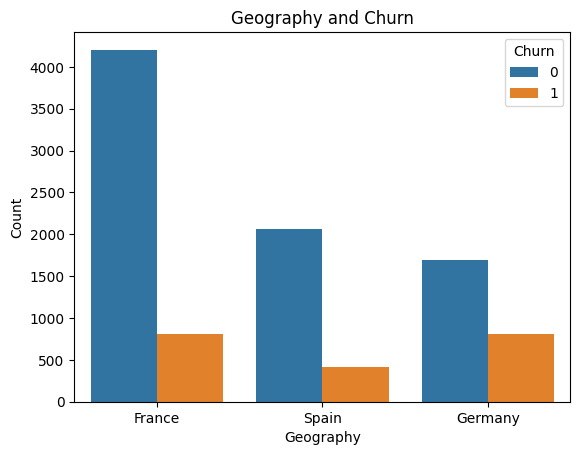

In [16]:
sns.countplot(x = 'Geography', hue = 'Churn', data = df)
plt.title('Geography and Churn')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Tenure', ylabel='count'>

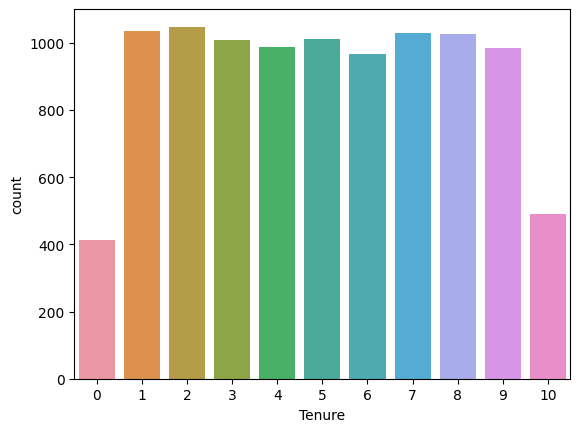

In [17]:
sns.countplot(x='Tenure', data=df)

<Axes: xlabel='Tenure', ylabel='count'>

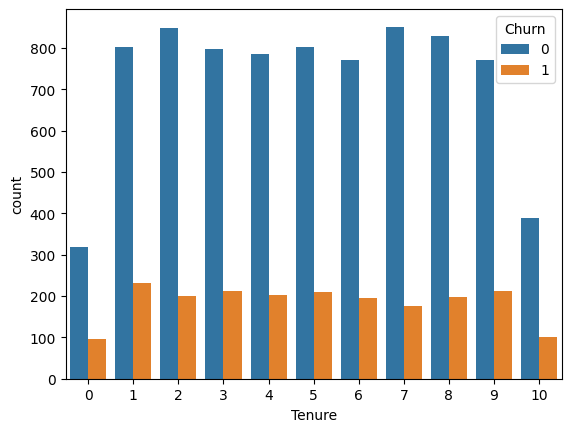

In [18]:
sns.countplot(x='Tenure', hue='Churn', data=df)

<Axes: xlabel='Balance', ylabel='Count'>

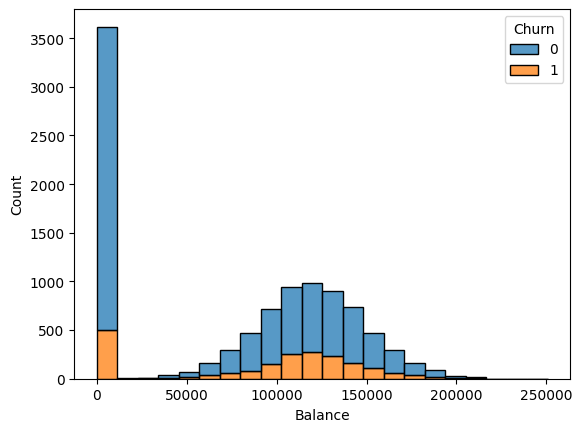

In [19]:
sns.histplot(data=df, x="Balance", hue="Churn", multiple="stack")

<Axes: xlabel='NumOfProducts', ylabel='count'>

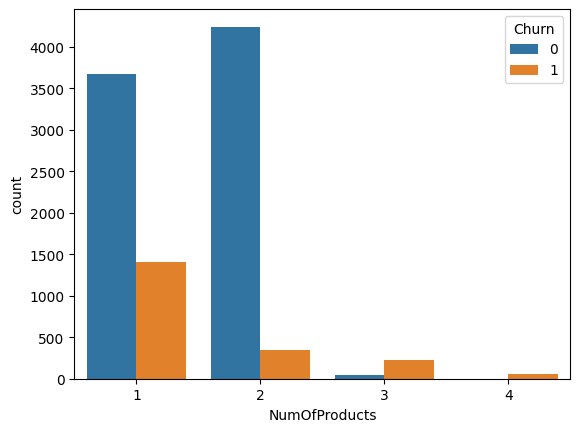

In [20]:
sns.countplot(x='NumOfProducts', hue='Churn', data=df)

<Axes: xlabel='HasCrCard', ylabel='count'>

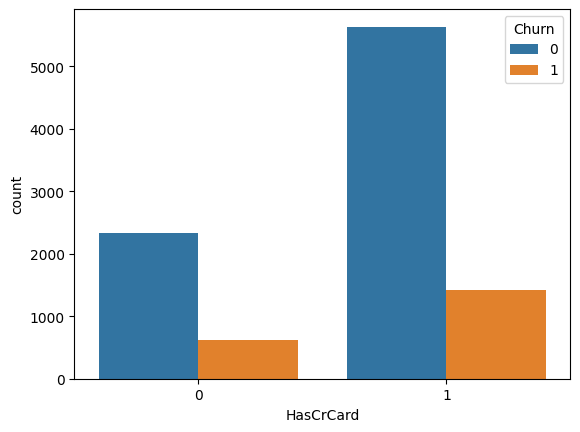

In [21]:
sns.countplot(x=df['HasCrCard'],hue=df['Churn'])

In [22]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

Data Preprocessing

In [23]:
#label encoding
variables = ['Geography','Gender']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in variables:
    le.fit(df[i].unique())
    df[i]=le.transform(df[i])
    print(i,df[i].unique())

Geography [0 2 1]
Gender [0 1]


In [24]:
#normalize the continuous variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['CreditScore','Balance','EstimatedSalary']] = scaler.fit_transform(df[['CreditScore','Balance','EstimatedSalary']])

In [25]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,-0.326221,0,0,42,2,-1.225848,1,1,1,0.021886,1
1,-0.440036,2,0,41,1,0.117350,1,0,1,0.216534,0
2,-1.536794,0,0,42,8,1.333053,3,1,0,0.240687,1
3,0.501521,0,0,39,1,-1.225848,2,0,0,-0.108918,0
4,2.063884,2,0,43,2,0.785728,1,1,1,-0.365276,0


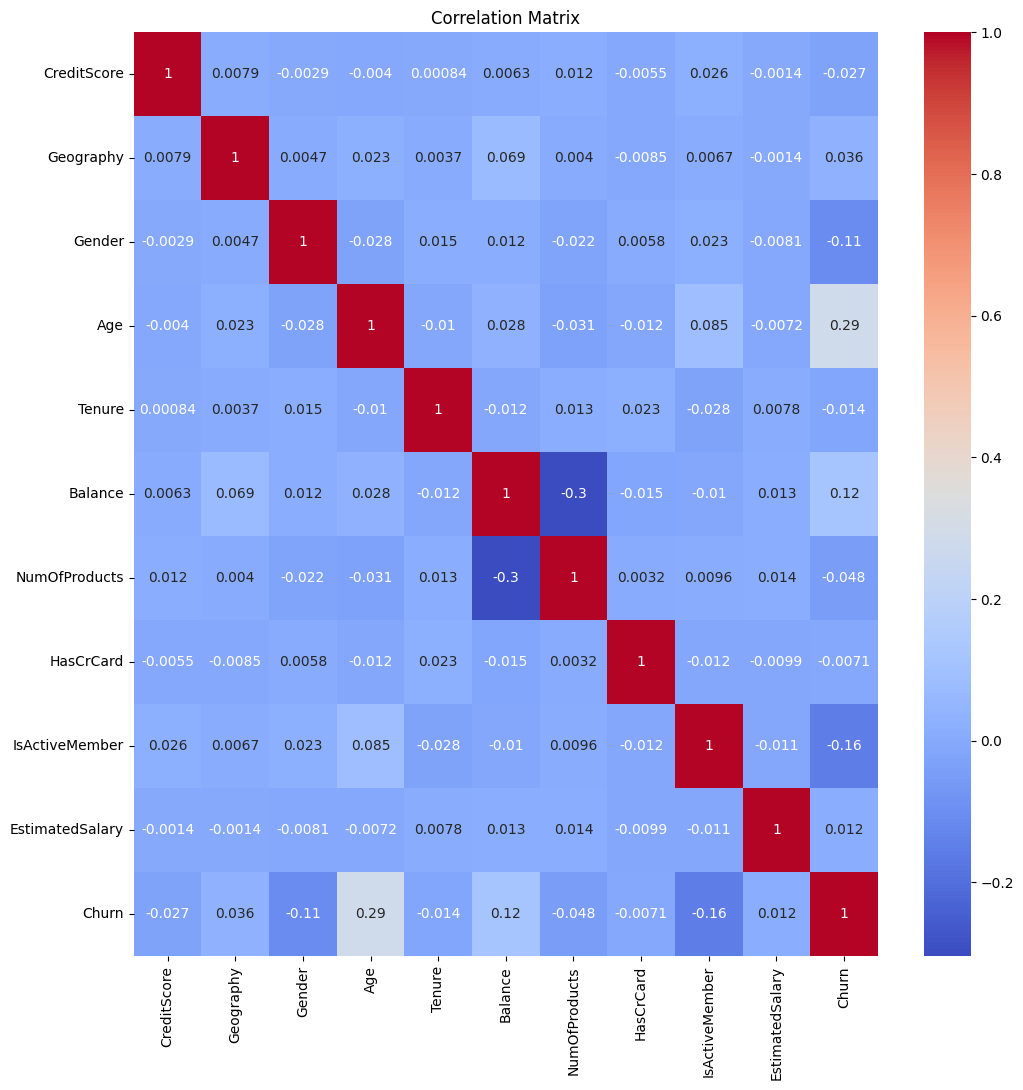

In [26]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [27]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('Churn',axis=1),df['Churn'],test_size=0.3,random_state=42)

Decision Tree Classifier:

Decision trees are hierarchical structures that make decisions by splitting data based on the values of input features. In a churn prediction scenario, a decision tree might look at various customer attributes (such as usage history, demographics, etc.) to determine whether a customer is likely to churn or not.

Pros:

    Easy to understand and interpret.
    Can handle both numerical and categorical data.
    Provides insights into feature importance and relationships.

Cons:

    Prone to overfitting, especially on complex datasets.
    A single decision tree might not capture all the nuances of the data.

Random Forest Classifier:

A random forest is an ensemble learning method that builds multiple decision trees and combines their predictions. Each tree is trained on a different subset of the data and features. The final prediction is determined by aggregating the predictions of individual trees.

Pros:

    Reduces overfitting by averaging predictions from multiple trees.
    Handles high-dimensional data and maintains good predictive accuracy.
    Provides feature importance rankings.

Cons:

    Complexity increases with the number of trees.
    Can be computationally intensive and require tuning.



Using GridSearchCV to find the best parameters for the model.


In [29]:


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
#creating Decision Tree Classifer object
dtree = DecisionTreeClassifier()

#defining parameter range
param_grid = {
    'max_depth': [2,4,6,8,10,12,14,16,18,20],
    'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
    }

#Creating grid search object
grid_dtree = GridSearchCV(dtree, param_grid, cv = 5, scoring = 'roc_auc')

#Fitting the grid search object to the training data
grid_dtree.fit(X_train, y_train)

#Printing the best parameters
print('Best parameters found: ', grid_dtree.best_params_)



Best parameters found:  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 10, 'random_state': 42}




Adding the parameters to the model


In [30]:
dtree = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=42, min_samples_leaf=10)
dtree

DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, random_state=42)

In [31]:
#training the model
dtree.fit(X_train,y_train)
#training accuracy
dtree.score(X_train,y_train)

0.8581428571428571

In [32]:
dtree_pred = dtree.predict(X_test)


Random Forest Classifier


In [33]:


from sklearn.ensemble import RandomForestClassifier
#creating Random Forest Classifer object
rfc = RandomForestClassifier()

#defining parameter range
param_grid = {
    'max_depth': [2,4,6,8,10],
    'min_samples_leaf': [2,4,6,8,10],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
    }

#Creating grid search object
grid_rfc = GridSearchCV(rfc, param_grid, cv = 5, scoring = 'roc_auc', n_jobs = -1, verbose = 1)

#Fitting the grid search object to the training data
grid_rfc.fit(X_train, y_train)

#Printing the best parameters
print('Best parameters found: ', grid_rfc.best_params_)



Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 8, 'random_state': 0}


In [34]:
rfc = RandomForestClassifier(min_samples_leaf=8, max_depth=10, random_state=0, criterion='entropy')
rfc

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=8,
                       random_state=0)

In [35]:

#training the model
rfc.fit(X_train, y_train)
#model accuracy
rfc.score(X_train, y_train)

0.8767142857142857

In [36]:
rfc_pred = rfc.predict(X_test)

Classification Report

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2416
           1       0.80      0.39      0.52       584

    accuracy                           0.86      3000
   macro avg       0.83      0.68      0.72      3000
weighted avg       0.85      0.86      0.84      3000



In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2416
           1       0.82      0.41      0.55       584

    accuracy                           0.87      3000
   macro avg       0.85      0.70      0.74      3000
weighted avg       0.86      0.87      0.85      3000



Both the models were hyperparameter tuned using GridSearchCV. Both the models have nearly equal accuracy score. But, the Random Forest Classifier has a better accuracy and precision score than the Decision Tree Classifier.